In [193]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sa
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('Pulsesurvey_New.csv')
df['Birthyear_bins'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011])
df['Birthyear_codes'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011], labels=[1,2,3,4,5,6])

ndexNames = df[df['Getvacc'] == 3].index
indexNames2 = df[df['Getvacc'] == 2].index

df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)
df = df[df.Income != -88]
df = df[df.Income != -99]
df['binary']=df['Getvacc'].apply(lambda x: 0 if(x==4) else(1))
df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income,Birthyear_bins,Birthyear_codes,binary
1,1941,1,1,1,5,1,0,1,2,2,...,-99,2,2,2,2,-88,4,"(1931, 1951]",1,1
6,1956,1,1,1,7,1,0,1,2,2,...,1,2,2,2,2,-88,4,"(1951, 1961]",2,1
7,1979,2,1,1,7,1,3,1,2,2,...,2,2,2,1,2,1,8,"(1971, 1981]",4,1
11,1959,2,1,1,7,1,0,1,2,2,...,2,2,2,2,1,-88,7,"(1951, 1961]",2,1
12,1968,2,1,1,4,1,0,1,2,2,...,2,2,2,2,3,-88,6,"(1961, 1971]",3,1


# Logistic Regression using Statsmodel

In [194]:
X= df[['Birthyear_codes', 'Income', 'Education', 'Expensdiff', 'Maritalstatus', 'Kindwork', 'Numkid', 'Tenure']]
y = df[["binary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

logReg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logReg.summary())

Optimization terminated successfully.
         Current function value: 0.263781
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 binary   No. Observations:                48540
Model:                          Logit   Df Residuals:                    48531
Method:                           MLE   Df Model:                            8
Date:                Sat, 01 May 2021   Pseudo R-squ.:                  0.1246
Time:                        03:52:03   Log-Likelihood:                -12804.
converged:                       True   LL-Null:                       -14626.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6901      0.080      8.650      0.000       0.534       0.847
Birthyear_code

In [124]:
print((np.exp(-2.744)+np.exp(0.0395*41)) / (np.exp(-2.744)+np.exp(0.0395*40)))
1/(1+np.exp(-(-2.7440+0.0395*40)))

1.0397637567392597


0.23794122425043068

# Odds Ratio

In [195]:
print(np.exp(logReg.params))

const              1.994013
Birthyear_codes    0.781590
Income             1.218172
Education          1.401953
Expensdiff         1.002046
Maritalstatus      1.004408
Kindwork           0.996819
Numkid             0.685956
Tenure             1.005047
dtype: float64


In [201]:
table = sm.stats.Table.from_data(df[["Education", "binary"]])
table.cumulative_oddsratios

binary,0,1
Education,,
1,3.151701,NaN
2,3.137895,NaN
3,2.800283,NaN
4,2.754775,NaN
5,3.595807,NaN
6,3.331699,NaN
7,NaN,NaN


In [199]:
table = sm.stats.Table.from_data(df[["Income", "binary"]])
table.cumulative_oddsratios

binary,0,1
Income,,
1,2.690400,NaN
2,2.481855,NaN
3,2.407398,NaN
4,2.351211,NaN
5,2.615110,NaN
6,2.915250,NaN
7,3.189927,NaN
8,NaN,NaN


In [200]:
table = sm.stats.Table.from_data(df[["Birthyear_codes", "binary"]])
table.cumulative_oddsratios

binary,0,1
Birthyear_codes,,
1,0.261830,NaN
2,0.305061,NaN
3,0.401333,NaN
4,0.486223,NaN
5,0.579040,NaN
6,NaN,NaN


# Regression Plots

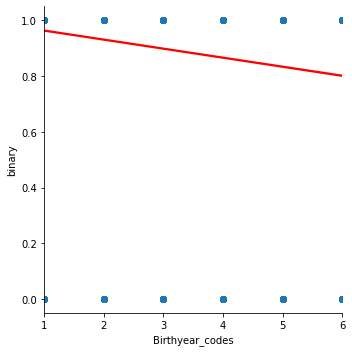

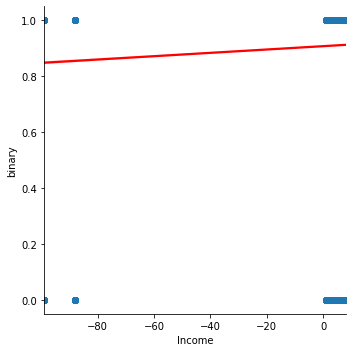

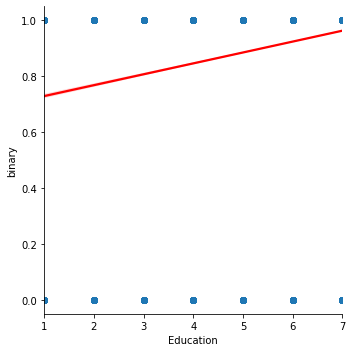

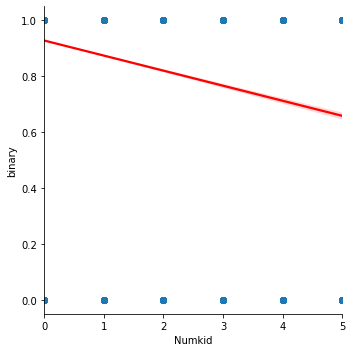

In [179]:
sns.lmplot(x="Birthyear_codes", y="binary", data=df, line_kws={'color':'red'})
sns.lmplot(x="Income", y="binary", data=df, line_kws={'color':'red'})
sns.lmplot(x = "Education", y = 'binary', data = df, line_kws={'color':'red'})
sns.lmplot(x="Numkid", y="binary", data=df, line_kws={'color':'red'})